<a href="https://colab.research.google.com/github/kanakagrawal23/Cat-Dog-Classifier/blob/main/Cat_vs_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
with zipfile.ZipFile('cat dog.zip', 'r') as file:
    file.extractall()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import os

In [ ]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
EPOCHS = 8

TRAIN_DIR = "/content/cat_dog_project/data/train"
TEST_DIR = "/content/cat_dog_project/data/test"

In [ ]:
train_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

])

In [ ]:
base_model = MobileNetV2(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = "imagenet"
)

base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(12, activation = "relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation = "sigmoid")
])

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE
)

test_data = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [ ]:
normalization_layer = layers.Rescaling(1./255)

train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
train_data = train_data.map(
    lambda x, y : (train_augmentation( x, training = True), y)
)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.prefetch(buffer_size = AUTOTUNE)
test_data = test_data.prefetch(buffer_size = AUTOTUNE)

In [ ]:
history = model.fit(
    train_data,
    validation_data = test_data,
    epochs = EPOCHS
)

Epoch 1/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 143s 492ms/step - accuracy: 0.9138 - loss: 0.2138 - val_accuracy: 0.9827 - val_loss: 0.0478
Epoch 2/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 96s 379ms/step - accuracy: 0.9626 - loss: 0.0979 - val_accuracy: 0.9812 - val_loss: 0.0445
Epoch 3/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 95s 377ms/step - accuracy: 0.9648 - loss: 0.0899 - val_accuracy: 0.9807 - val_loss: 0.0469
Epoch 4/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 95s 378ms/step - accuracy: 0.9661 - loss: 0.0881 - val_accuracy: 0.9876 - val_loss: 0.0431
Epoch 5/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 94s 375ms/step - accuracy: 0.9717 - loss: 0.0723 - val_accuracy: 0.9802 - val_loss: 0.0464
Epoch 6/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 96s 383ms/step - accuracy: 0.9667 - loss: 0.0811 - val_accuracy: 0.9807 - val_loss: 0.0491
Epoch 7/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 95s 379ms/step - accuracy: 0.9704 - loss: 0.0761 - val_accuracy: 0.9847 - val_loss: 0.0424
Epoch 8/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 94s 373ms/step - accuracy: 0.9721 - loss: 0.0637 -

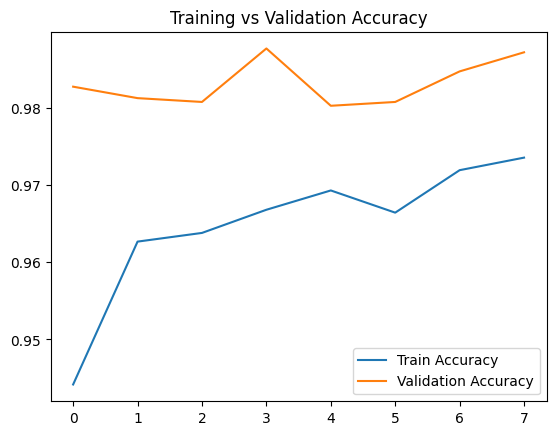

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving img2.jpg to img2.jpg


In [ ]:
image_path = list(uploaded.keys())[0]

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(image_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = img_array / 255.0   # normalize
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
prediction = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [ ]:
if prediction[0][0] > 0.5:
    print("🐶 Dog")
else:
    print("🐱 Cat")

🐶 Dog


In [ ]:
confidence = prediction[0][0]
print(f"Confidence: {confidence:.2f}")

Confidence: 1.00


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


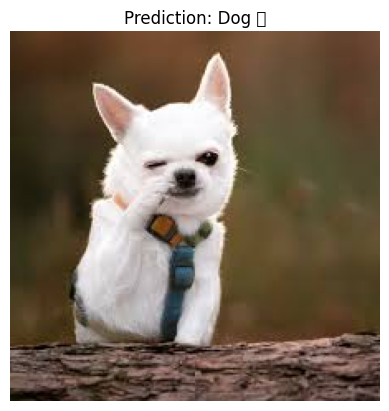

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis("off")
plt.title("Prediction: Dog 🐶" if prediction[0][0] > 0.5 else "Prediction: Cat 🐱")
plt.show()